In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
X, y = make_moons(n_samples=100, noise= 0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

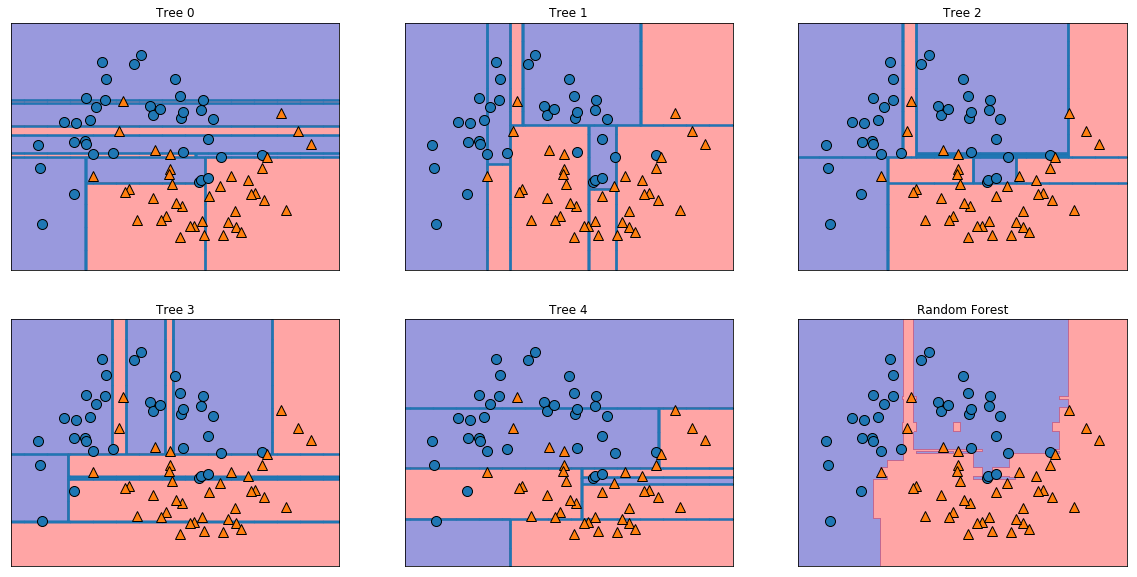

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


In [10]:
# Now testing with the breast cancer dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy training set: 1.000
Accuracy test set: 0.972


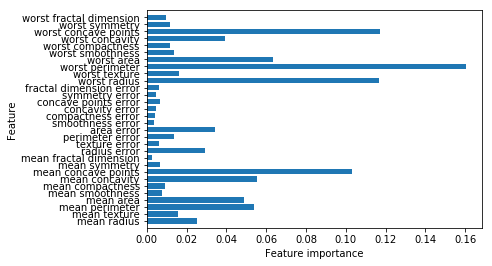

In [16]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),
             model.feature_importances_,
             align="center")
    
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)